In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
import numpy as np
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.formula.api as smf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
cocacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",header=0, index_col=0, parse_dates=True)
cocacola

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [3]:
# EDA

cocacola.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [4]:
cocacola[cocacola.duplicated]

,Sales
Quarter,


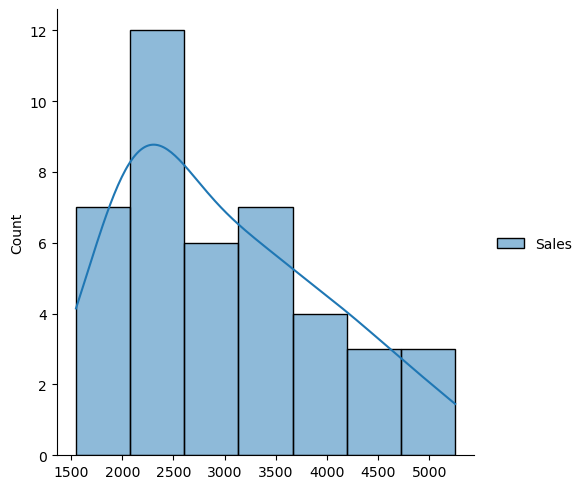

In [5]:
import seaborn as sns

sns.displot(cocacola, kde=True)

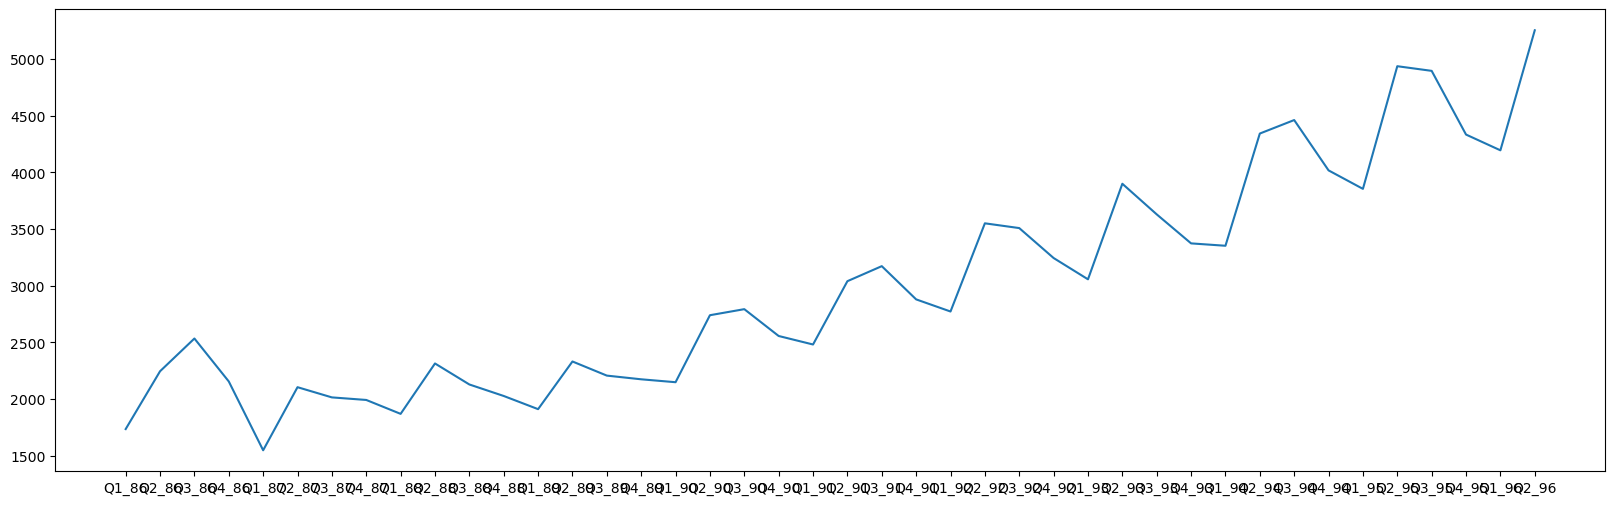

In [6]:
plt.figure(figsize=(20,6))
plt.plot(cocacola)

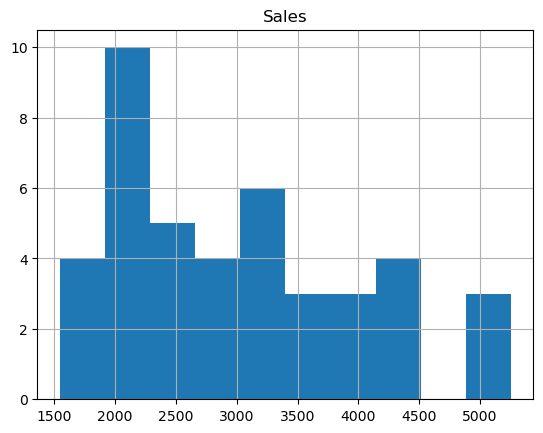

In [7]:
cocacola.hist()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2157daf4e90>,
 'caps': [<matplotlib.lines.Line2D at 0x2157db1f510>,
 'boxes': [<matplotlib.lines.Line2D at 0x2157d8d5150>],
 'medians': [<matplotlib.lines.Line2D at 0x2157db2cad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2157db2d510>],
 'means': []}

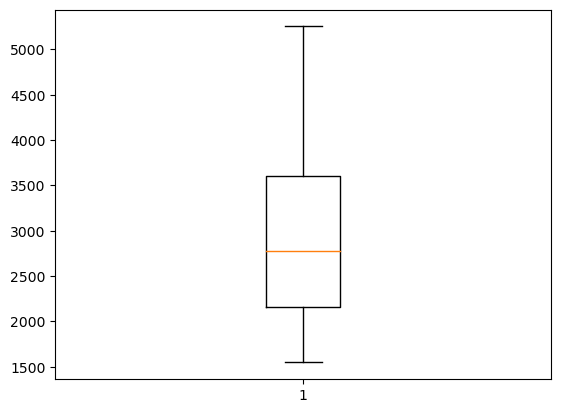

In [8]:
plt.boxplot(cocacola)

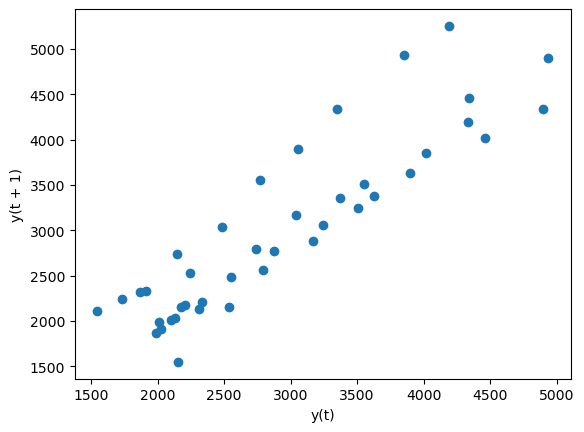

In [9]:
lag_plot(cocacola['Sales'])
plt.show()

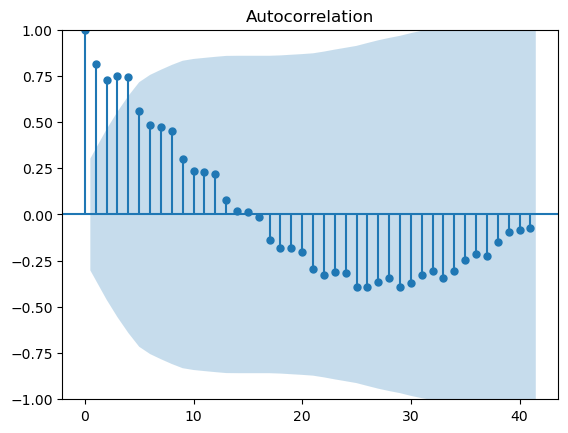

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(cocacola,lags=41)
plt.show()

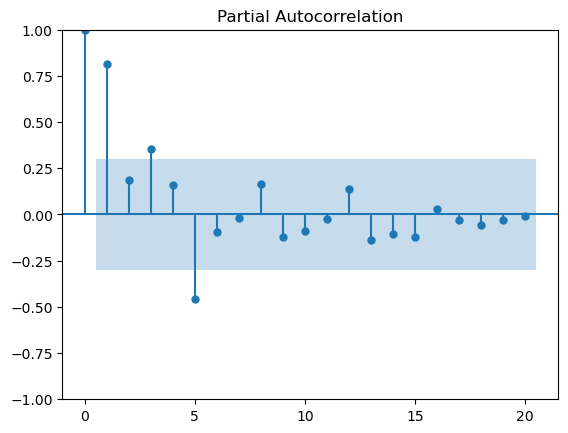

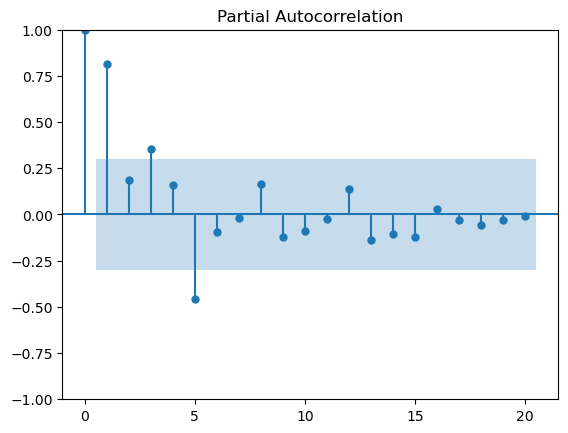

In [11]:
plot_pacf(cocacola,lags=20)

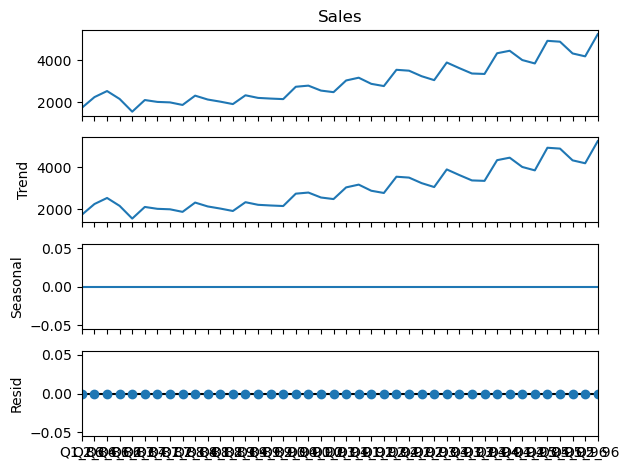

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(cocacola.Sales,model='additive', extrapolate_trend='freq', period=1)
decompose_ts_add.plot()
plt.show()

In [13]:
# ARIMA

# Augmented Dickey-Fuller (ADF) test

# import the adfuller function from statsmodel package to perform ADF test
from statsmodels.tsa.stattools import adfuller

# extracting values from data frame
values = cocacola.values

# passing the extracted values to adfuller function.
res = adfuller(values)

# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f'  %res[1])

# printing the critical values at different alpha levels and the result of the test.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))
if (res[1] > 0.025):
    print("The time series is non-stationary")

Augmneted Dickey_fuller Statistic: 1.309421
p-value: 0.996661
critical values at different levels:
	1%: -3.639
	5%: -2.951
	10%: -2.614
The time series is non-stationary


p value:0.11510080332405515 , Series is Non-Stationary


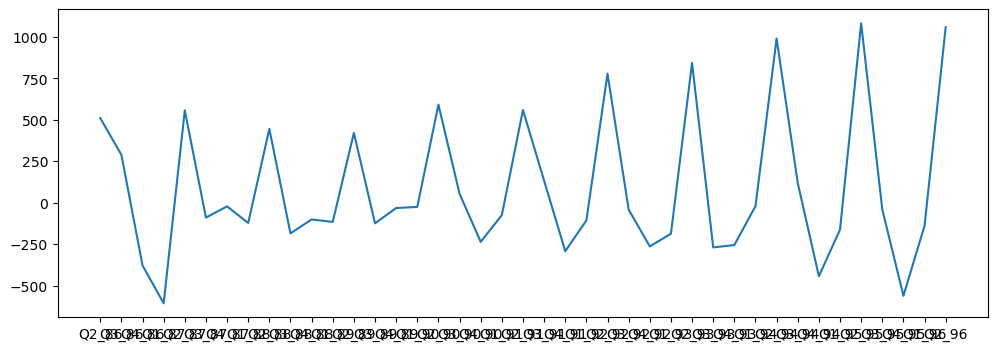

In [14]:
#De-trending with first order differencing

data1 = pd.DataFrame(cocacola["Sales"].diff())
de_trended = data1.dropna()
adf2 = adfuller(de_trended.values)[1]
print(f"p value:{adf2}", ", Series is Stationary" if adf2 <0.05 else ", Series is Non-Stationary")
plt.figure(figsize = (12,4))
plt.plot(de_trended);
plt.show()

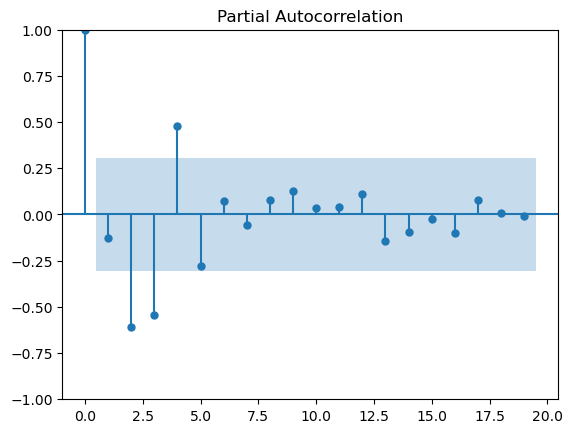

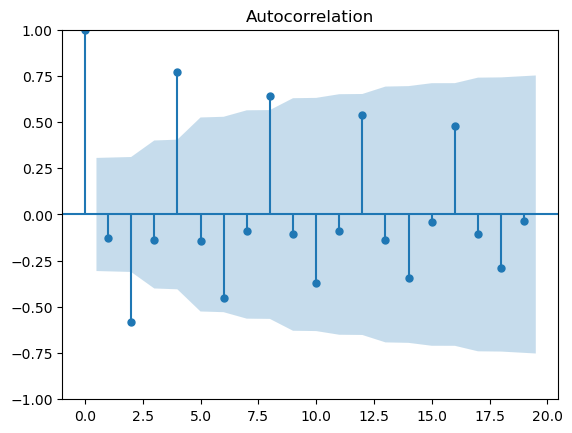

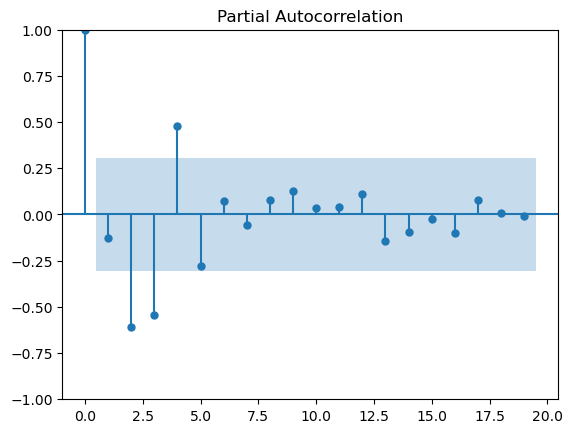

In [15]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(de_trended.values,lags=19)
tsa_plots.plot_pacf(de_trended.values,lags=19)

In [16]:
# p=2, d=1, q=2

In [17]:
# separate out a validation dataset

split_point = len(cocacola) - 8
train, validation = cocacola[0:split_point], cocacola[split_point:]
print('Dataset %d, Validation %d' % (len(train), len(validation)))
train.to_csv('cocacola_dataset.csv', header=True)
validation.to_csv('cocacola_validation.csv', header=True)

Dataset 34, Validation 8


In [18]:
X = train.values
X = X.astype('float32')

In [19]:
validation

,Sales
Quarter,
Q3_94,4461.0
Q4_94,4017.0
Q1_95,3854.0
Q2_95,4936.0
Q3_95,4895.0
Q4_95,4333.0
Q1_96,4194.0
Q2_96,5253.0


In [20]:
# fit model

model = ARIMA(X, order=(2,1,2))
model_fit = model.fit()
forecast = model_fit.forecast(steps=8)
forecast

C:\Users\vaibh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([4102.53645017, 3594.1050675 , 3857.87678661, 4345.03320526,
       4058.44058468, 3593.50604309, 3901.40128514, 4343.26238605])

In [21]:
test = pd.read_csv("cocacola_validation.csv")
test

,Quarter,Sales
0,Q3_94,4461.0
1,Q4_94,4017.0
2,Q1_95,3854.0
3,Q2_95,4936.0
4,Q3_95,4895.0
5,Q4_95,4333.0
6,Q1_96,4194.0
7,Q2_96,5253.0


In [22]:
test["forecast"]=forecast

In [23]:
test

,Quarter,Sales,forecast
0,Q3_94,4461.0,4102.536450
1,Q4_94,4017.0,3594.105067
2,Q1_95,3854.0,3857.876787
3,Q2_95,4936.0,4345.033205
4,Q3_95,4895.0,4058.440585
5,Q4_95,4333.0,3593.506043
6,Q1_96,4194.0,3901.401285
7,Q2_96,5253.0,4343.262386


In [24]:
#Error on the test data

val=pd.read_csv('cocacola_validation.csv')
rmse = np.sqrt(mean_squared_error(val.Sales, forecast))
rmse

593.3498677313062

In [25]:
# Combine train and test data and build final model

data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",header=0, index_col=0, parse_dates=True)

# prepare data
X = data.values
print(X[0:5])
print(X.dtype)

[[1734.82699966]
 [2244.96099854]
 [2533.80499268]
 [2154.96299744]
 [1547.81899643]]
float64


In [26]:
X = X.astype('float32')

In [27]:
model = ARIMA(X, order=(2,1,2))
model_fit = model.fit()

In [28]:
forecast=model_fit.forecast(steps=5)
forecast

array([5148.72371563, 4348.40820149, 4458.97846954, 5238.82212567,
       5122.33448313])

In [29]:
forecastdata = pd.DataFrame()
forecastdata["forecasted_val"] = forecast

In [30]:
forecastdata

,forecasted_val
0,5148.723716
1,4348.408201
2,4458.978470
3,5238.822126
4,5122.334483


In [31]:
data.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [32]:
cocacola_sales = pd.concat([data,forecastdata], ignore_index=True)

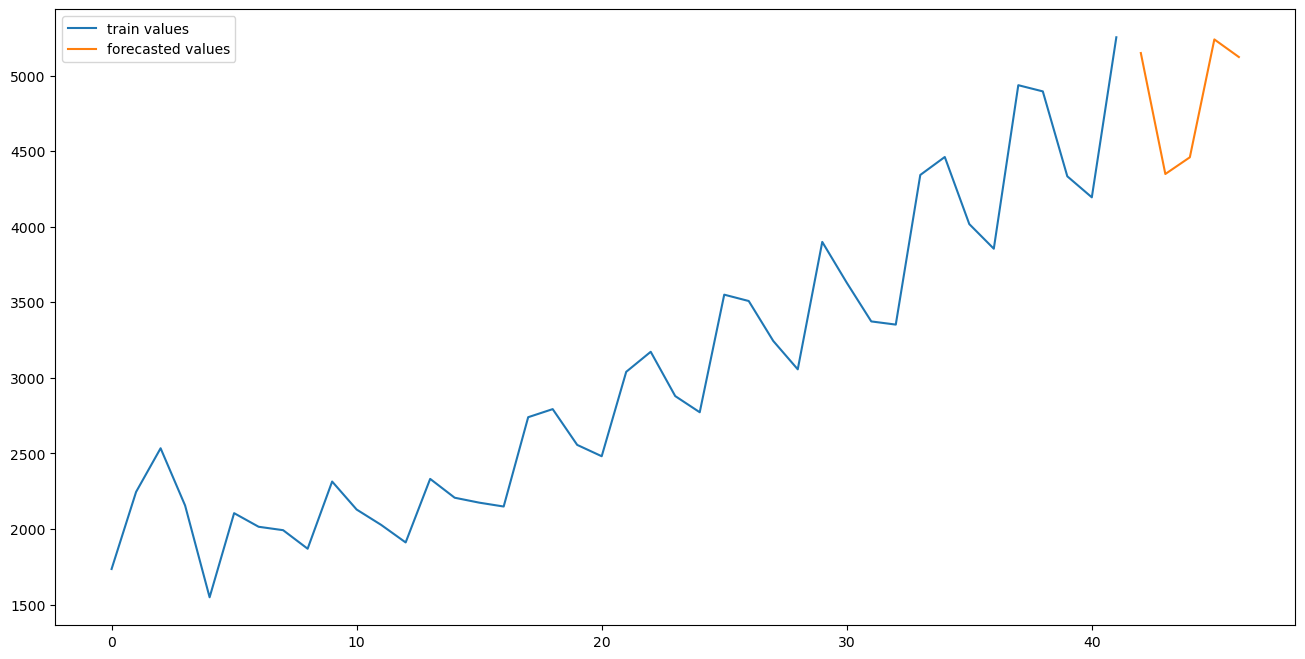

In [33]:
plt.figure(figsize=(16,8))

plt.plot(cocacola_sales["Sales"], label='train values')
plt.plot(cocacola_sales["forecasted_val"], label="forecasted values")
plt.legend(loc='best')
plt.show()

In [37]:
cocacola.columns

Index(['Sales'], dtype='object')

In [38]:
cocacola.reset_index(inplace=True)

In [39]:
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [40]:
demo = cocacola.copy()

In [41]:
demo.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [42]:
initial_val="NaN"
demo['quart']=initial_val[0:2]
demo['year']=0
for i in range(0,demo.shape[0]):
    temp=demo['Quarter'][i]
    demo['quart'][i]=temp[0:2]
    demo['year'][i]=temp[3:5]

C:\Users\vaibh\AppData\Local\Temp\ipykernel_12672\2340249867.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['quart'][i]=temp[0:2]
C:\Users\vaibh\AppData\Local\Temp\ipykernel_12672\2340249867.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['year'][i]=temp[3:5]


In [43]:
demo.head()

,Quarter,Sales,quart,year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [44]:
demo['QART']=demo['quart'].map({'Q1':'01-04','Q2':'01-07','Q3':'01-10','Q4':'01-01'})
for i in range(0,demo.shape[0]):
    date=demo['quart'][i]
    demo['year'][i]="19"+demo['year'][i]
    demo['date']=demo['QART']+"-"+(demo['year'])

In [45]:
demo.drop('QART',axis=1,inplace=True)

In [46]:
demo.head()

,Quarter,Sales,quart,year,date
0,Q1_86,1734.827000,Q1,1986,01-04-1986
1,Q2_86,2244.960999,Q2,1986,01-07-1986
2,Q3_86,2533.804993,Q3,1986,01-10-1986
3,Q4_86,2154.962997,Q4,1986,01-01-1986
4,Q1_87,1547.818996,Q1,1987,01-04-1987


In [47]:
cleaned_data=demo.drop(['Quarter','year'],axis=1)
cleaned_data.date = pd.to_datetime(cleaned_data.date)
cleaned_data.set_index('date',inplace=True)
cleaned_data.head()

,Sales,quart
date,,
1986-01-04,1734.827000,Q1
1986-01-07,2244.960999,Q2
1986-01-10,2533.804993,Q3
1986-01-01,2154.962997,Q4
1987-01-04,1547.818996,Q1


In [48]:
#upsampling
upsample=cleaned_data.resample('m').mean()
upsample

C:\Users\vaibh\AppData\Local\Temp\ipykernel_12672\425227306.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  upsample=cleaned_data.resample('m').mean()


,Sales
date,
1986-01-31,2167.138997
1986-02-28,NaN
1986-03-31,NaN
1986-04-30,NaN
1986-05-31,NaN
...,...
1995-09-30,NaN
1995-10-31,NaN
1995-11-30,NaN


******nearest******


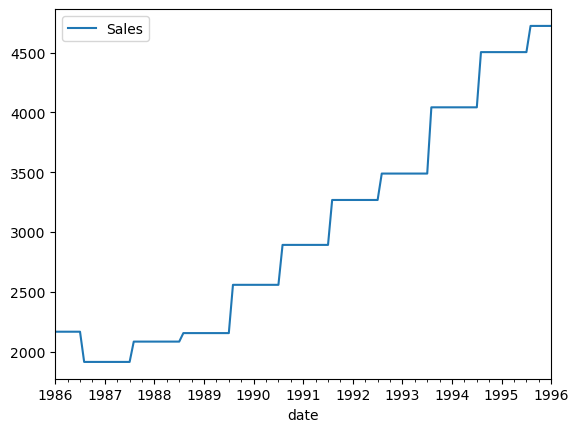

******zero******


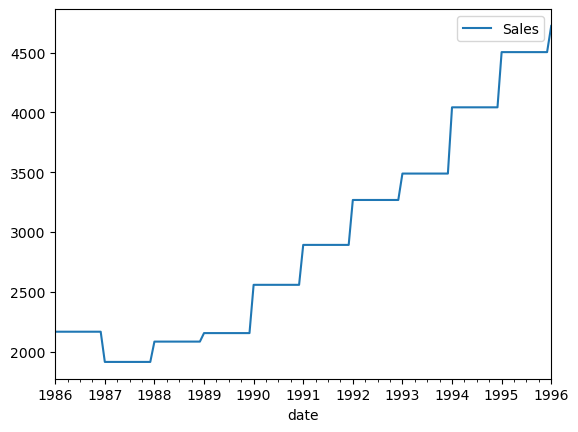

In [49]:
method=[ 'nearest', 'zero']
for data in method:
    print("******{}******".format(data))
    interpolated=upsample.interpolate(method=data)
    interpolated.plot()
    plt.show()

In [50]:
demo.head()

,Quarter,Sales,quart,year,date
0,Q1_86,1734.827000,Q1,1986,01-04-1986
1,Q2_86,2244.960999,Q2,1986,01-07-1986
2,Q3_86,2533.804993,Q3,1986,01-10-1986
3,Q4_86,2154.962997,Q4,1986,01-01-1986
4,Q1_87,1547.818996,Q1,1987,01-04-1987


In [51]:
demo['t']=np.arange(1,43)
demo['t_squared']=demo['t']**2
demo['sales_log']=np.log(demo['Sales'])
demo['sales_sqrt']=np.sqrt(demo['Sales'])
demo.head()

,Quarter,Sales,quart,year,date,t,t_squared,sales_log,sales_sqrt
0,Q1_86,1734.827000,Q1,1986,01-04-1986,1,1,7.458663,41.651254
1,Q2_86,2244.960999,Q2,1986,01-07-1986,2,4,7.716443,47.381019
2,Q3_86,2533.804993,Q3,1986,01-10-1986,3,9,7.837477,50.336915
3,Q4_86,2154.962997,Q4,1986,01-01-1986,4,16,7.675529,46.421579
4,Q1_87,1547.818996,Q1,1987,01-04-1987,5,25,7.344602,39.342331


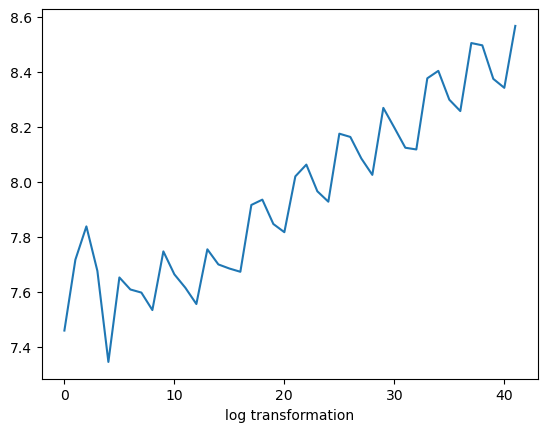

In [52]:
plt.plot(demo['sales_log'])
plt.xlabel("log transformation")
plt.show()

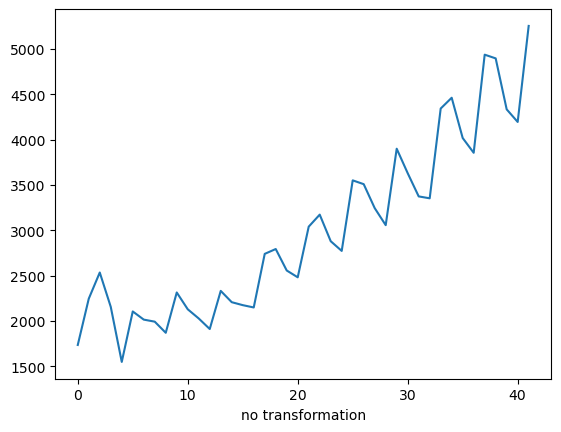

In [53]:
plt.plot(demo['Sales'])
plt.xlabel("no transformation")
plt.show()

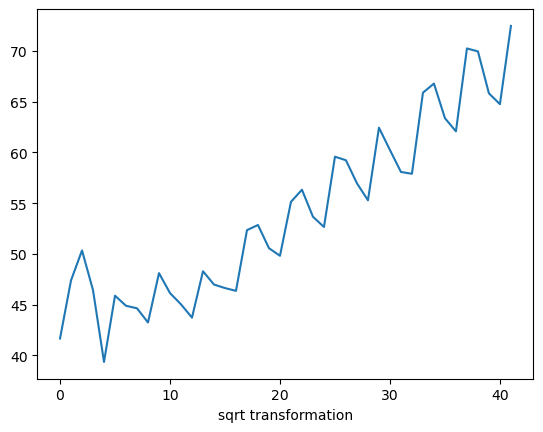

In [54]:
plt.plot(demo['sales_sqrt'])
plt.xlabel("sqrt transformation")
plt.show()

In [55]:
#OHE to quarter column
demo=pd.get_dummies(demo,columns=['quart'])

In [56]:
#test train split
train=demo.head(32)
test=demo.tail(10)

In [57]:
train.tail()

,Quarter,Sales,year,date,t,t_squared,sales_log,sales_sqrt,quart_Q1,quart_Q2,quart_Q3,quart_Q4
27,Q4_92,3243.859993,1992,01-01-1992,28,784,8.084519,56.954894,0,0,0,1
28,Q1_93,3056.000000,1993,01-04-1993,29,841,8.024862,55.281100,1,0,0,0
29,Q2_93,3899.000000,1993,01-07-1993,30,900,8.268475,62.441973,0,1,0,0
30,Q3_93,3629.000000,1993,01-10-1993,31,961,8.196712,60.241182,0,0,1,0
31,Q4_93,3373.000000,1993,01-01-1993,32,1024,8.123558,58.077534,0,0,0,1


In [58]:
test.head()

,Quarter,Sales,year,date,t,t_squared,sales_log,sales_sqrt,quart_Q1,quart_Q2,quart_Q3,quart_Q4
32,Q1_94,3352.0,1994,01-04-1994,33,1089,8.117312,57.896459,1,0,0,0
33,Q2_94,4342.0,1994,01-07-1994,34,1156,8.376090,65.893854,0,1,0,0
34,Q3_94,4461.0,1994,01-10-1994,35,1225,8.403128,66.790718,0,0,1,0
35,Q4_94,4017.0,1994,01-01-1994,36,1296,8.298291,63.379808,0,0,0,1
36,Q1_95,3854.0,1995,01-04-1995,37,1369,8.256867,62.080593,1,0,0,0


In [59]:
#linear model
linear_model=smf.ols('Sales~t',data=train).fit()
linear_pred=linear_model.predict(test['t'])
linear_rmse=np.sqrt(mean_squared_error(test['Sales'],linear_pred))
linear_rmse

752.9233932767115

In [60]:
#quadratic
quad_model=smf.ols('Sales~t+t_squared',data=train).fit()
quad_pred=quad_model.predict(test[['t','t_squared']])
quad_rmse=np.sqrt(mean_squared_error(test['Sales'],quad_pred))
quad_rmse

457.73573554072897

In [61]:
#exponential
expo_model=smf.ols('sales_log~t',data=train).fit()
expo_pred=expo_model.predict(test['t'])
expo_rmse=np.sqrt(mean_squared_error(test['sales_log'],expo_pred))
expo_rmse

0.13535411499114683

In [62]:
#additive sea
add_seas_model=smf.ols('Sales~quart_Q1+quart_Q2+quart_Q3+quart_Q4',data=train).fit()
add_seas_pred=add_seas_model.predict(test[['quart_Q1','quart_Q2','quart_Q3','quart_Q4']])
add_seas_rmse=np.sqrt(mean_squared_error(test['Sales'],add_seas_pred))
add_seas_rmse

1850.4665461858358

In [63]:
#Additive Seasonality Quadratic
add_seas_quad_model=smf.ols('Sales~t+t_squared+quart_Q1+quart_Q2+quart_Q3+quart_Q4',data=train).fit()
add_seas_quad_pred=add_seas_quad_model.predict(test[['t','t_squared','quart_Q1','quart_Q2','quart_Q3','quart_Q4']])
add_seas_quad_rmse=np.sqrt(mean_squared_error(test['Sales'],add_seas_quad_pred))
add_seas_quad_rmse

277.35107711286446

In [65]:
#Multiplicative Seasonality
mul_seas_model=smf.ols('sales_log~quart_Q1+quart_Q2+quart_Q3+quart_Q4',data=train).fit()
mul_seas_pred=mul_seas_model.predict(test[['quart_Q1','quart_Q2','quart_Q3','quart_Q4']])
mul_seas_rmse=np.sqrt(mean_squared_error(test['sales_log'],mul_seas_pred))
mul_seas_rmse

0.5629197471132791

In [66]:
#Multiplicative quadratic Seasonality
mul_seas_quad_model=smf.ols('sales_log~t+t_squared+quart_Q1+quart_Q2+quart_Q3+quart_Q4',data=train).fit()
mul_seas_quad_pred=mul_seas_quad_model.predict(test[['t','t_squared','quart_Q1','quart_Q2','quart_Q3','quart_Q4']])
mul_seas_quad_rmse=np.sqrt(mean_squared_error(test['sales_log'],mul_seas_quad_pred))
mul_seas_quad_rmse

0.15450929745698339

In [67]:
data={"MODEL":pd.Series(['linear model','quadratic','Exponential','additive sea',
                        'Additive Seasonality Quadratic' ,'Multiplicative Seasonality','Multiplicative quadratic Seasonality']),
      "RMSE SCORE":pd.Series([linear_rmse,quad_rmse,expo_rmse,add_seas_rmse,add_seas_quad_rmse,mul_seas_rmse,mul_seas_quad_rmse])}
data_rmse=pd.DataFrame(data)
data_rmse

,MODEL,RMSE SCORE
0,linear model,752.923393
1,quadratic,457.735736
2,Exponential,0.135354
3,additive sea,1850.466546
4,Additive Seasonality Quadratic,277.351077
5,Multiplicative Seasonality,0.562920
6,Multiplicative quadratic Seasonality,0.154509
